**Agata Semerjak**, 402426  
gr 3a, środa 17:00

In [1]:
import sklearn
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn import linear_model, tree
from scipy.spatial import distance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

## Ex. 1-3 - Linear regression for Boston dataset

In [2]:
boston = load_boston() #loading the data
print(boston.keys()) #getting info about data
print(boston.data.shape)
print(boston.DESCR)

df = pd.DataFrame(boston.data)
print(df.head())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
X = df
y = pd.DataFrame(boston.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) #splitting into training and test data
print("Rozmiar danych wejściowych (liczba wierszy) = ", X.shape[0])
print("Część danych treningowych = ", float(X_train.shape[0]) / float(X.shape[0]))
print("Część danych testowych = ", float(X_test.shape[0]) / float(X.shape[0]))

Rozmiar danych wejściowych (liczba wierszy) =  506
Część danych treningowych =  0.7984189723320159
Część danych testowych =  0.2015810276679842


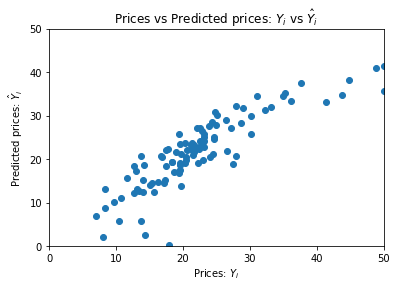

In [4]:
regr = linear_model.LinearRegression() #creating the linear regression model
regr.fit(X_train.to_numpy(), y_train) #training model
y_pred = regr.predict(X_test.to_numpy()) #predicting for test values
y_pred_train = regr.predict(X_train.to_numpy()) #predicting for train values

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.xlim((0, 50))
plt.ylim((0, 50))
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

Ideal scatter plot should be covering the y=x line.

In [5]:
print("Mean Squared Error (train set) = ", sklearn.metrics.mean_squared_error(y_train, y_pred_train)) #computing score and MSE for both training and test sets
print("R² score (train set) = ", regr.score(X_train, y_train))
print("\nMean Squared Error (test set) = ", sklearn.metrics.mean_squared_error(y_test, y_pred))
print("R² score (test set) = ", regr.score(X_test, y_test))

Mean Squared Error (train set) =  22.477090408387628
R² score (train set) =  0.738339392059052

Mean Squared Error (test set) =  20.869292183770906
R² score (test set) =  0.7334492147453064


## Ex. 4 - Regression on scaled data

In [6]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X) #scaling the data
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=5) #splitting into training and testing sets

poly = PolynomialFeatures(degree=2)

X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

model = linear_model.LinearRegression() #regression after regularization
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

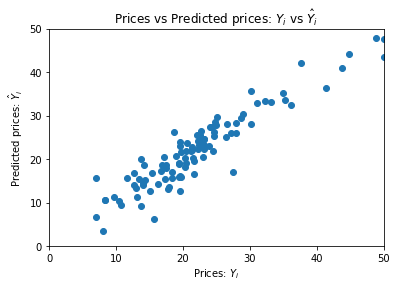

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.xlim((0, 50))
plt.ylim((0, 50))
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [8]:
print("\nMean Squared Error (test set) = ", sklearn.metrics.mean_squared_error(y_test, y_pred))
print(" R² score (test set) = ", model.score(X_test, y_test))


Mean Squared Error (test set) =  10.176545686815295
 R² score (test set) =  0.8700211669799554


## Ex. 5 Lasso

In [9]:
model = Lasso(alpha=1) #performing the Lasso regression with base alpha = 1
model.fit(X_train, y_train) #training the model
y_pred = model.predict(X_test) #predicting values for test set
print("Score for training data = ", model.score(X_train, y_train))
print("Score for test data = ", model.score(X_test, y_test))

Score for training data =  0.7616635843347157
Score for test data =  0.8226311949222024


We have a strange situation - score for test is better than for training - it means that penalty is too strict - we need smaller alpha.

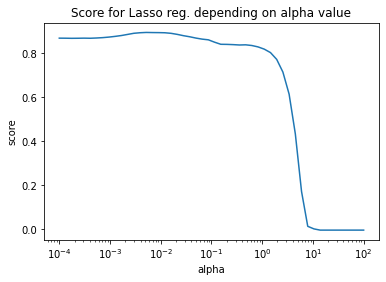

In [10]:
alphas = np.logspace(-4, 2)
scores = []
for a in alphas: #looking for the right alpha
  model = Lasso(alpha=a, max_iter=500000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  scores.append(model.score(X_test, y_test))

plt.plot(alphas, scores)
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Score for Lasso reg. depending on alpha value")
plt.show()

In [11]:
best_alpha = alphas[np.argmax(scores)]
print("Najlepsza wartość alfa = ", best_alpha)
model = Lasso(alpha=best_alpha, max_iter=500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)
print("Score for training data = ", model.score(X_train, y_train))
print("Score for test data = ", model.score(X_test, y_test))

Najlepsza wartość alfa =  0.005179474679231213
Score for training data =  0.9281044465105456
Score for test data =  0.8947603275317457


## Ex. 6 Ridge

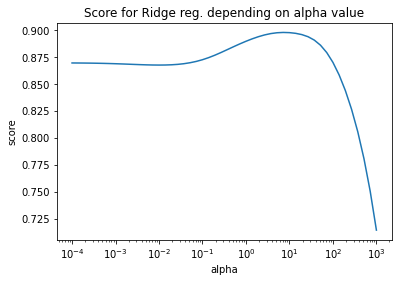

In [12]:
alphas = np.logspace(-4, 3)
scores = []
for a in alphas: #looking for the best alpha for Ridge regression
  model = Ridge(alpha=a) #preforming the Ridge regression
  model.fit(X_train, y_train) #training the model
  y_pred = model.predict(X_test) #predicting for test set
  scores.append(model.score(X_test, y_test))

plt.plot(alphas, scores)
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Score for Ridge reg. depending on alpha value")
plt.show()

In [13]:
best_alpha = alphas[np.argmax(scores)]
print("Best alpha value = ", best_alpha)
model = Ridge(alpha=best_alpha, max_iter=500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)
print("Score for training data = ", model.score(X_train, y_train))
print("Score for test data = ", model.score(X_test, y_test))

Best alpha value =  7.196856730011514
Score for training data =  0.9202775271018946
Score for test data =  0.8977103840618064


## Regularization for logistic regression

In [14]:
X, y = load_breast_cancer(return_X_y=True)
print("Number of Nan elements = ", pd.isnull(X).sum().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Number of Nan elements =  0


In [15]:
logreg = LogisticRegression(penalty="l1", C=1, solver='liblinear', max_iter=5000) #performing the logistic regression with l1 penalty
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy = ", logreg.score(X_test, y_test))

Accuracy =  0.9736842105263158


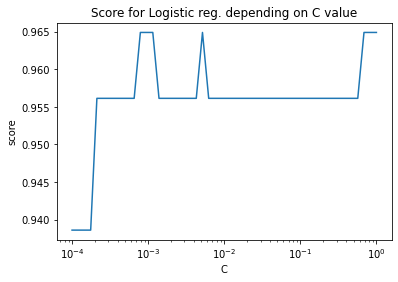

In [16]:
Cs = np.logspace(-4, 0)
scores = []
for c in Cs: #looking for the best c parameter for logistic regression with l2 penalty
  model = LogisticRegression(penalty="l2", C=c, max_iter=5000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  scores.append(model.score(X_test, y_test))

plt.plot(Cs, scores)
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("score")
plt.title("Score for Logistic reg. depending on C value")
plt.show()

In [17]:
best_c = Cs[np.argmax(scores)]
print("Best C value = ", best_c)
model = LogisticRegression(penalty="l2", C=best_c, max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy = ", model.score(X_test, y_test))

Best C value =  0.0007906043210907702
Accuracy =  0.9649122807017544


## Regularization for kNN method

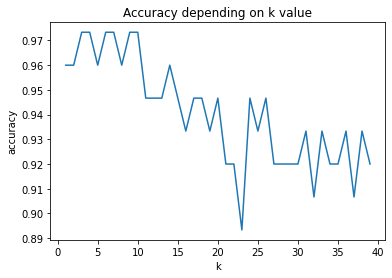

In [18]:
def neighbours(data, new_point, k):
  distances = []
  for idx in range(len(data)):
    point = data[idx]
    dst = distance.euclidean(new_point, point) #computing distance to every other point from training set
    distances.append((point, idx, dst))
  distances.sort(key=lambda tup: tup[2]) #sorting distances from smallest to biggest
  nearest = distances[0:k] #getting only k nearest neighbours
  out = [(point, idx) for point, idx, dist in nearest] #returning neighbours and their indexes

  return out
 

def predict(X_train, y_train, new_point, k):
  neighbours_list = neighbours(X_train, new_point, k) #generating k nearest neigbours
  nearest_labels = []
  for point, idx in neighbours_list:
    nearest_labels.append(y_train[idx]) #making list of labels of k nearest neighbours
  prediction = max(nearest_labels, key=nearest_labels.count) #getting the most frequent label
  return prediction

iris = load_iris()
 
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=5)
 
# Checking the effectiveness of the classifier
ks = range(1, 40)

accs = []
for k in ks:
  predictions = [predict(features_train, labels_train, new_point, k) for new_point in features_test]
  output = accuracy_score(labels_test, predictions)
  accs.append(output)

plt.plot(ks, accs)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("Accuracy depending on k value")
plt.show()

The best value for k are between 3 and 9. I decide to choose k = 7.

In [19]:
predictions = [predict(features_train, labels_train, new_point, 7) for new_point in features_test]
output = accuracy_score(labels_test, predictions)
print("Accuracy for k = 7 :", output)

Accuracy for k = 7 : 0.9733333333333334


## Decision trees optimization

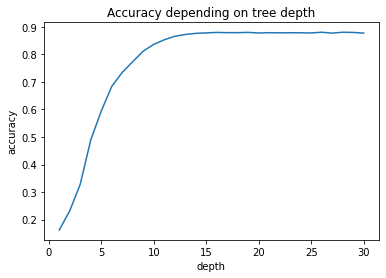

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Standardization
for i in range(X_train.shape[0]):
    X_train[i,:] = X_train[i,:]/np.std(X_train[i,:])

for i in range(X_test.shape[0]):
    X_test[i,:] = X_test[i,:]/np.std(X_test[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y_train[np.where(y_train==10)]=0
y_test[np.where(y_test==10)]=0

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

depths = np.linspace(1, 30, num=30)
accs = []
for d in depths:
  t = tree.DecisionTreeClassifier(max_depth=d)
  t.fit(X_train, y_train)
  accs.append(t.score(X_test, y_test))

plt.plot(depths, accs)
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.title("Accuracy depending on tree depth")
plt.show()

For depth > 15 we can't see any significant difference, so in my opinion it is enough for the accuracy and it doesn't take as much time as depth = 30.

In [21]:
t = tree.DecisionTreeClassifier(max_depth=15)
t.fit(X_train, y_train)
print("Accuracy for depth = 15 : ", t.score(X_test, y_test))

Accuracy for depth = 15 :  0.8763
